In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

In [133]:
data = pd.read_csv("../dataset/finaltipteldataset.csv",on_bad_lines='skip')

In [134]:
data = data.drop(['VENDEDOR','RAZON SOCIAL MATERIAL','DIAS >=90','LECTOR DE MEGA','Referencia','Dom. Legal Av. Calle Jr.'], axis=1)

In [135]:
data.rename(columns={'FECHA DE VENTA':'FECHA','DNI/RUC':'NRODOCUMENTO','TIPO DE VENTA':'PRODUCTO','Plan':'PLAN','Distrito':'DISTRITO','Provincia':'PROVINCIA','Departamento':'DEPARTAMENTO','TIPO VAL BIOMETRICA':'TIPOLECTOR','SERIE LECTOR':'LECTOR','RAZON SOCIAL LECTOR':'RSLECTOR','DIAS ANTIGUEDAD':'DIASANT','OPE CEDENTE':'OPECEDENTE'},inplace=True)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16001 entries, 0 to 16000
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FECHA         16001 non-null  object 
 1   SERIE         16001 non-null  int64  
 2   NRODOCUMENTO  783 non-null    float64
 3   CLIENTE       16001 non-null  object 
 4   NUMERO        16001 non-null  int64  
 5   PRODUCTO      16001 non-null  object 
 6   PLAN          783 non-null    object 
 7   CORREO        783 non-null    object 
 8   DISTRITO      776 non-null    object 
 9   PROVINCIA     777 non-null    object 
 10  DEPARTAMENTO  777 non-null    object 
 11  TIPOLECTOR    16001 non-null  object 
 12  LECTOR        15956 non-null  object 
 13  RSLECTOR      16001 non-null  object 
 14  DIASANT       16001 non-null  object 
 15  OPECEDENTE    16001 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 2.0+ MB


In [137]:
#bool_documento = pd.isna(data['NRODOCUMENTO'])
data = data.astype({'NRODOCUMENTO':'str'})
#data['NRODOCUMENTO']=data['NRODOCUMENTO'].fillna(value='')
data['NRODOCUMENTO']=data['NRODOCUMENTO'].replace({'nan':''},regex=True)

In [138]:
# light = data['NRODOCUMENTO']!=''
# data['NRODOCUMENTO'][light]
data['NRODOCUMENTO']=data['NRODOCUMENTO'].replace({'.0':''},regex=True)

In [139]:
data['PLAN']=data['PLAN'].replace({'Max ':''},regex=True)

In [140]:
data['PLAN']=data['PLAN'].replace({'Ilimitado ':''},regex=True)

In [141]:
data['PLAN']=data['PLAN'].fillna(value='')

In [142]:
data['CORREO']=data['CORREO'].fillna(value='')

In [143]:
data['DISTRITO']=data['DISTRITO'].fillna(value='')

In [144]:
data['PROVINCIA']=data['PROVINCIA'].fillna(value='')

In [145]:
data['DEPARTAMENTO']=data['DEPARTAMENTO'].fillna(value='')

In [146]:
data['OPECEDENTE']=data['OPECEDENTE'].replace({'0':''},regex=True)

In [147]:
data['OPECEDENTE']=data['OPECEDENTE'].replace({'#N/D':''},regex=True)

In [148]:
data['TIPOLECTOR']=data['TIPOLECTOR'].replace({'#N/D':''},regex=True)

In [149]:
#data['RSLECTOR'].drop_duplicates()
data['RSLECTOR']=data['RSLECTOR'].replace({'MEGA CONNECTION S.A.C.':'MEGA'},regex=True)
data['RSLECTOR']=data['RSLECTOR'].replace({'SERVICIO DE TELECOMUNICACIONES MEGA':'MEGA'},regex=True)
data['RSLECTOR']=data['RSLECTOR'].replace({'#N/D':''},regex=True)
data['RSLECTOR']=data['RSLECTOR'].replace({'0':''},regex=True)

In [150]:
data['DIASANT']=data['DIASANT'].replace({'#N/D':'0'},regex=True)
data['DIASANT']=data['DIASANT'].replace({'':'0'},regex=True)
data['DIASANT']=data['DIASANT'].astype(int)

In [151]:
data['LECTOR']=data['LECTOR'].fillna('')

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16001 entries, 0 to 16000
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FECHA         16001 non-null  object
 1   SERIE         16001 non-null  int64 
 2   NRODOCUMENTO  16001 non-null  object
 3   CLIENTE       16001 non-null  object
 4   NUMERO        16001 non-null  int64 
 5   PRODUCTO      16001 non-null  object
 6   PLAN          16001 non-null  object
 7   CORREO        16001 non-null  object
 8   DISTRITO      16001 non-null  object
 9   PROVINCIA     16001 non-null  object
 10  DEPARTAMENTO  16001 non-null  object
 11  TIPOLECTOR    16001 non-null  object
 12  LECTOR        16001 non-null  object
 13  RSLECTOR      16001 non-null  object
 14  DIASANT       16001 non-null  int32 
 15  OPECEDENTE    16001 non-null  object
dtypes: int32(1), int64(2), object(13)
memory usage: 1.9+ MB


In [153]:
data.isnull().sum()

FECHA           0
SERIE           0
NRODOCUMENTO    0
CLIENTE         0
NUMERO          0
PRODUCTO        0
PLAN            0
CORREO          0
DISTRITO        0
PROVINCIA       0
DEPARTAMENTO    0
TIPOLECTOR      0
LECTOR          0
RSLECTOR        0
DIASANT         0
OPECEDENTE      0
dtype: int64

In [178]:
days = data['FECHA']
#unique days 31 59
unique_days=days.drop_duplicates()

composed_days=[]
light=[]

for i,row in unique_days.items():
    light = data['FECHA']==row
    final = data[light].shape
    composed_days.append([row,final[0]])
    #print(final[0])
np_composed_days = np.array(composed_days)
pre_number_data = np_composed_days[:,1]
number_data = pre_number_data.astype(np.int32)
#plt.plot(np_composed_days[:31,0],number_data[:31])
#number_data
#plt.show()
#light = data['FECHA DE VENTA']==unique_days[0]
#final = data[light].shape
#final[0]

In [224]:
#JANUARY
jan_date = np_composed_days[:31]
jan_num = jan_date[:,1].astype(np.int32)

#FEBRUARY
feb_date = np_composed_days[31:59]
feb_num = feb_date[:,1].astype(np.int32)

#MARCH
mar_date = np_composed_days[59:]
mar_num = mar_date[:,1].astype(np.int32)

#jan_num.sum()
#feb_num.sum()
#mar_num.sum()

#jan_num.mean() #158.22
#feb_num.mean() #175.07
#mar_num.mean() #199.81

#np.median(mar_num)
#mode(mar_num)
#mar_num

array([196, 157, 188, 182, 196, 200, 219, 173, 213, 203, 201, 235, 216,
       265, 204, 221, 206, 183, 212, 198, 226, 215, 209, 170, 175, 200,
       207, 192, 155, 188, 189])

In [245]:
#PRODUCTS
products = data['PRODUCTO'].drop_duplicates()
products
# light = []
# for i,row in unique_days[:31].items():
#     the_bool = data['FECHA']==row
#     light.append(the_bool)
# light_bool = np.array(light)
altanueva = data[data['PRODUCTO'].str.contains('CHIP PREPAGO')]
portapost = data[data['PRODUCTO'].str.contains('CHIP PORTA POSTPAGO')]
portapre = data[data['PRODUCTO'].str.contains('CHIP PORTA PREPAGO')]
altapost = data[data['PRODUCTO'].str.contains('CHIP POSTPAGO')]
# altanueva[data['FECHA'].str.contains('/03/2022')].shape
#portapre[data['FECHA'].str.contains('/01/2022')].shape
# altapost[data['FECHA'].str.contains('/03/2022')].shape
portapost[data['FECHA'].str.contains('/01/2022')].shape

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14688\2986736734.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  portapost[data['FECHA'].str.contains('/01/2022')].shape


(143, 16)

In [142]:
np_composed_days
dataFrame = pd.DataFrame(np_composed_days,columns=['fecha','cantidad'])
dataFrame

,fecha,cantidad
0,1/01/2022,44
1,2/01/2022,150
2,3/01/2022,168
3,4/01/2022,217
4,5/01/2022,195
...,...,...
85,27/03/2022,207
86,28/03/2022,192
87,29/03/2022,155
88,30/03/2022,188


In [99]:
def valuelabel(x_axis,y_axis):
    for i in range(len(x_axis)):
        plt.text(i,y_axis[i],y_axis[i], ha = 'center',
                 bbox = dict(facecolor = 'cyan', alpha =0.8))
#number_data
#plt.show()
#light = data['FECHA DE VENTA']==unique_days[0]
#final = data[light].shape
#final[0]

(3131,)

<BarContainer object of 140 artists>

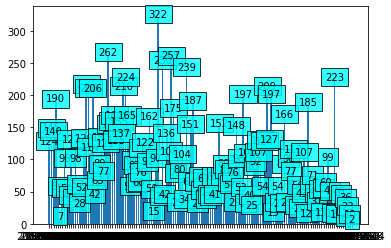

In [124]:
#MEGA
is_mega = data['RSLECTOR']=='MEGA'
biometricos = data['LECTOR'][is_mega]
unique_biometricos=biometricos.drop_duplicates()
# unique_biometricos.shape
composed_bios=[]

for i,row in unique_biometricos.items():
    light_bio = data['LECTOR']==row
    final_bio = data[light_bio].shape
    composed_bios.append([row,final_bio[0]])
np_composed_bios = np.array(composed_bios)
pre_bio_data = np_composed_bios[:,1]
number_data_bio = pre_bio_data.astype(np.int32)
valuelabel(np_composed_bios[:,0],number_data_bio)

plt.bar(np_composed_bios[:,0],number_data_bio)

<BarContainer object of 171 artists>

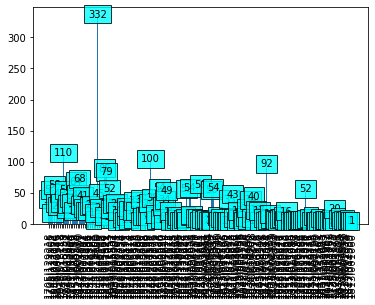

In [128]:
is_not_mega = data['RSLECTOR']!='MEGA'
biometricos_tp = data['LECTOR'][is_not_mega]
unique_biometricos_tp=biometricos_tp.drop_duplicates()
# unique_biometricos_tp.shape
composed_bios_tp=[]

for i,row in unique_biometricos_tp.items():
    light_bio_tp = data['LECTOR']==row
    final_bio_tp = data[light_bio_tp].shape
    composed_bios_tp.append([row,final_bio_tp[0]])
np_composed_bios_tp = np.array(composed_bios_tp)
pre_bio_data_tp = np_composed_bios_tp[:,1]
number_data_bio_tp = pre_bio_data_tp.astype(np.int32)

ax = plt.subplot()
ax.tick_params(axis='x',labelrotation=90)

valuelabel(np_composed_bios_tp[:,0],number_data_bio_tp)

plt.bar(np_composed_bios_tp[:,0],number_data_bio_tp)

<BarContainer object of 2 artists>

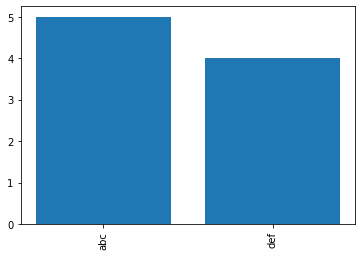

In [127]:
def valuelabel(x_axis,y_axis):
    for i in range(len(x_axis)):
        plt.text(i,y_axis[i],y_axis[i], ha = 'center',
                 bbox = dict(facecolor = 'cyan', alpha =0.8))
a=['abc','def']
ax = plt.subplot()
ax.tick_params(axis='x',labelrotation=90)
plt.bar(a,[5,4])

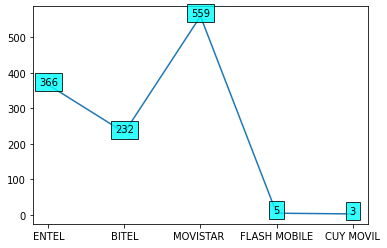

In [249]:
opes = data['OPECEDENTE']
unique_opes=opes.drop_duplicates()
composed_opes=[]

for i,row in unique_opes.items():
    light_ope = data['OPECEDENTE']==row
    final_ope = data[light_ope].shape
    composed_opes.append([row,final_ope[0]])
np_composed_opes = np.array(composed_opes)
pre_number_data_ope = np_composed_opes[:,1]
number_data_ope = pre_number_data_ope.astype(np.int32)
valuelabel(np_composed_opes[1:,0],number_data_ope[1:])
plt.plot(np_composed_opes[1:,0],number_data_ope[1:])